## **PUTRI NUR AINI MAHFUDZ (M203Y0411)**

## **NLP dengan Tensorflow**

---



## Berikut ini Proyek Pertama : Membuat Model NLP dengan TensorFlow yang saya kerjakan dengan memenuhi kriteria submission yang ada.

Dataset didapatkan dari : https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category



## Steps:

### 1. Impor library pandas dan ubah dataset menjadi dataframe

In [2]:
import pandas as pd
df = pd.read_csv('bbc-text.csv')

### 2. Panggil fungsi head() untuk menampilkan sampel teratas pada dataset

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


### 3. Panggil fungsi shape untuk melihat jumlah baris dan kolom

In [4]:
df.shape

(2225, 2)

### 4. Lakukan one-hot-encoding dan buat dataframe baru

In [5]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


### 5. Ubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values

In [6]:
text = df_baru['text'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

### 6. Lakukan pemisahan data menjadi data latih dan data testing

In [7]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

### 7. Ubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer, lalu mengonversi setiap sampel menjadi sequence

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

### 8. Membangun model menggunakan model sequential

In [9]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])



### 9. Panggil fungsi compile dan tentukan optimizer serta loss function, kemudian lihat arsitektur model yang telah kita buat

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 117,637
Trainable params: 117,637
Non-trainable params: 0
_________________________________________________________________


### 10. Menerapkan Callback, training akan berhenti di val_accuracy > 0.85

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.85):
      print("STOP")
      self.model.stop_training = True

callbacks = myCallback()

### 11. Melatih mode dengan model.fit

In [12]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
56/56 - 103s - loss: 1.6034 - accuracy: 0.2320 - val_loss: 1.5970 - val_accuracy: 0.3348 - 103s/epoch - 2s/step
Epoch 2/30
56/56 - 101s - loss: 1.4887 - accuracy: 0.3287 - val_loss: 1.3760 - val_accuracy: 0.3730 - 101s/epoch - 2s/step
Epoch 3/30
56/56 - 100s - loss: 1.2837 - accuracy: 0.5118 - val_loss: 1.1962 - val_accuracy: 0.5888 - 100s/epoch - 2s/step
Epoch 4/30
56/56 - 100s - loss: 0.2024 - accuracy: 0.9365 - val_loss: 0.5772 - val_accuracy: 0.7955 - 100s/epoch - 2s/step
Epoch 6/30
56/56 - 102s - loss: 0.0964 - accuracy: 0.9742 - val_loss: 0.5200 - val_accuracy: 0.8382 - 102s/epoch - 2s/step
Epoch 7/30
56/56 - 102s - loss: 0.0356 - accuracy: 0.9921 - val_loss: 0.5831 - val_accuracy: 0.8404 - 102s/epoch - 2s/step
Epoch 8/30
56/56 - 103s - loss: 0.0205 - accuracy: 0.9978 - val_loss: 0.6085 - val_accuracy: 0.8427 - 103s/epoch - 2s/step
Epoch 9/30
STOP
56/56 - 102s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6354 - val_accuracy: 0.8607 - 102s/epoch - 2s/step


### 12. Melihat visualisasi nilai akurasi

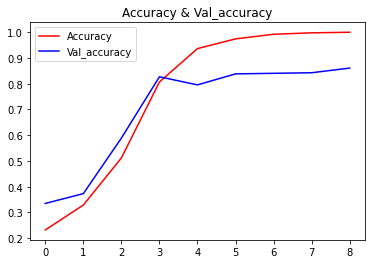

<Figure size 432x288 with 0 Axes>

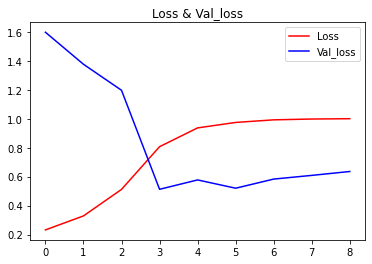

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt                                                  
acc = history.history['accuracy']                                                
val_acc = history.history['val_accuracy']                                         
loss = history.history['loss']                                                    
val_loss = history.history['val_loss']                                            

epochs = range(len(acc))                                                          

plt.plot(epochs, acc, 'r', label='Accuracy')                                                 
plt.plot(epochs, val_acc, 'b', label='Val_accuracy')                          
plt.title('Accuracy & Val_accuracy')                                        
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()

plt.plot(epochs, acc, 'r', label='Loss')                                                 
plt.plot(epochs, val_loss, 'b', label='Val_loss')                          
plt.title('Loss & Val_loss')                                        
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()

## **Terimakasih.**

## **Submission project kelas Belajar Pengembangan Machine Learning - 2022** 